<a href="https://colab.research.google.com/github/pkor725/Autolib-car-services-Hypothesis-testing/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2019_12_Gideon_k_Cheruiyot_ipynb_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **overview**

Autolib is a car-hire company in France that allows its users in France to hire their cars and return them.The company has Bluecars,Utilib and Utililb 1.4 variety of vehicles.

In our study, we will explore the usage of their vehicles by their customers based on the days of the week. Based on our findings and observations we can help the company increase efficiency in their operations especially when it comes to allocation of resources and customer satisfaction.To facilitate this we will do an exploratory analysis by undertaking univariate, bivariate and multivariate analysis.

**Objective**

By doing exploratory analysis we will be able to find out which day has the most cars returns and therefore, advice the management on resource allocation based on our findings. To guide the decesion making process, based on our findings, we will be able to formulate an hyphothesis and further test it through statistical models. Depending on the test results we will be able to come up with an informed decision for Autolib team.

The intial stages of our analysis will cover basic datacleanning and processing to refine our data for proper analysis

**Data description**

source:http://bit.ly/DSCoreAutolibDataset


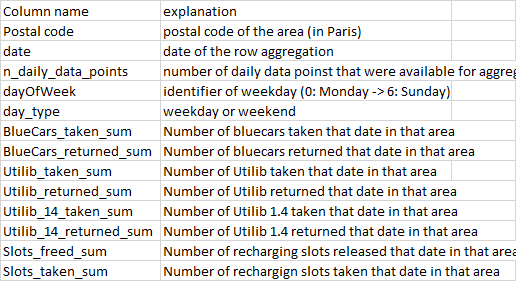

Link to my github repository:https://github.com/pkor725/Autolib-car-hire-services/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2019_12_Gideon_k_Cheruiyot_ipynb.ipynb

In [0]:
#importing python libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#Reading our file
a_df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
a_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
#checking the data types for our attributes
a_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
#converting attribute date into datetime format

a_df['date'] = pd.to_datetime(a_df['date'])

In [0]:
#confirming changes.
a_df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [0]:
#setting date as index for our dataframe
a_df = a_df.set_index('date')


In [0]:
#adding weekday names using datetimeindexing
a_df['weekday name'] = a_df.index.weekday_name 
a_df.sort_values(by='date', ascending=True).head(10)

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,weekday name
date,,,,,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,3,2,10,9,22,20,Monday
2018-01-01,93300,1440,0,weekday,12,13,0,0,0,1,0,0,Monday
2018-01-01,92700,1440,0,weekday,109,104,3,2,17,14,0,0,Monday
2018-01-01,92420,1440,0,weekday,12,9,0,0,4,3,0,0,Monday
2018-01-01,75012,1440,0,weekday,502,512,7,6,32,35,122,120,Monday
2018-01-01,75007,1440,0,weekday,249,208,22,20,11,10,55,46,Monday
2018-01-01,93600,1440,0,weekday,15,14,0,0,1,1,0,0,Monday
2018-01-01,92140,1440,0,weekday,66,74,4,5,5,3,0,0,Monday
2018-01-01,93170,1440,0,weekday,49,43,3,3,3,2,0,0,Monday


In [0]:
a_df.shape

(16085, 13)

In [0]:
#finding  null values
a_df.isnull().sum()

Postal code               0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
weekday name              0
dtype: int64

In [0]:
#undertaking our descriptive analysis
# pp.ProfileReport(a_df)
a_df[['BlueCars_returned_sum', 'BlueCars_taken_sum', 'Utilib_taken_sum','Utilib_returned_sum', 'Utilib_14_returned_sum','Utilib_14_taken_sum','Slots_freed_sum','Slots_taken_sum']].describe()

,BlueCars_returned_sum,BlueCars_taken_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_returned_sum,Utilib_14_taken_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,125.912714,125.926951,3.698290,3.699099,8.599192,8.600560,22.629033,22.629282
std,185.501535,185.426579,5.815058,5.824634,12.868993,12.870098,52.120263,52.146030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1332.000000,1352.000000,54.000000,58.000000,101.000000,100.000000,360.000000,359.000000


Our dataset has no Null values but has zero values which sugest presence of null values. To reduce chances having skewed data, we will be compelled to  drop null values. Extreme values on the upper side also indicate presence of outliers.


In [0]:
#Replacing '0' values with null
a_df = a_df.replace(to_replace = 0, value = np.nan)
# deleting null values
a_df.isnull().sum()


Postal code                   0
n_daily_data_points           0
dayOfWeek                  2374
day_type                      0
BlueCars_taken_sum           65
BlueCars_returned_sum        31
Utilib_taken_sum           5442
Utilib_returned_sum        5383
Utilib_14_taken_sum        2888
Utilib_14_returned_sum     2859
Slots_freed_sum           10227
Slots_taken_sum           10235
weekday name                  0
dtype: int64

After making the above adjustment, it is clear that the most of our attributes have missing values and therfore do not make good dataset for analysis. On the other hand, 'BlueCars_taken_sum' and 'BlueCars_returned_sum' attributes appears to have less missing values and therefore, makes a suitable data for our analysis. Besides, the latter attributes  appears to be a good representative as show in the graph below.
As a result , we will be compelled to drop the rest of the colums with large number of missing values.  

AttributeError: ignored

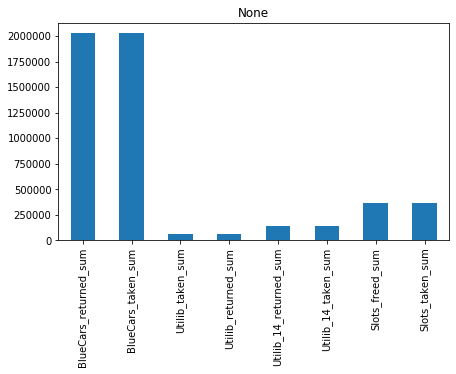

In [0]:
#Univariate analysis
# comparison of the type of cars based on usage
cols_plot = ['BlueCars_returned_sum', 'BlueCars_taken_sum','Utilib_taken_sum','Utilib_returned_sum', 'Utilib_14_returned_sum','Utilib_14_taken_sum','Slots_freed_sum','Slots_taken_sum']
ax = a_df[cols_plot].sum().plot(figsize=(7, 4), subplots=True, kind ='bar')
ax.set_title('mean')
plt.show()

In [0]:
#droping least helpful colums- those with many null values
a_df = a_df.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum','Slots_taken_sum','dayOfWeek'], axis =1)


In [0]:
# deleting null values
a_df.dropna()
a_df.shape

(16085, 6)

In [0]:
#checking for any remaining  missing values
a_df.isnull().sum()

Postal code               0
n_daily_data_points       0
day_type                  0
BlueCars_taken_sum       65
BlueCars_returned_sum    31
weekday name              0
dtype: int64

In [0]:
a_df[['BlueCars_returned_sum', 'BlueCars_taken_sum']].describe()

,BlueCars_returned_sum,BlueCars_taken_sum
count,16054.000000,16020.00000
mean,126.155849,126.43789
std,185.597940,185.62846
min,1.000000,1.00000
25%,20.000000,20.00000
50%,46.000000,46.00000
75%,135.000000,136.00000
max,1332.000000,1352.00000


Our dataset has outliers as shown above. Using interquatile range method (IQR) method we will remove the outliers


Text(0, 0.5, 'day type')

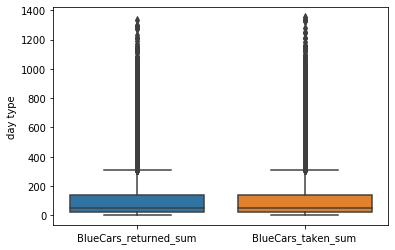

In [0]:
#Checking for outliers

fig, ax = plt.subplots()
# sns.boxplot(data=a_df, y='BlueCars_returned_sum')
# ax.set_ylabel('day type')

sns.boxplot(data=a_df[['BlueCars_returned_sum','BlueCars_taken_sum']])
ax.set_ylabel('day type')

In [0]:
Q1 = a_df.quantile(0.25)
Q3 = a_df.quantile(0.75)
IQR = Q3 - Q1
#Remove Outliers

c_df = a_df[~((a_df < (Q1 - 0.85* IQR)) |(a_df> (Q3 + 0.85* IQR))).any(axis=1)]


AttributeError: ignored

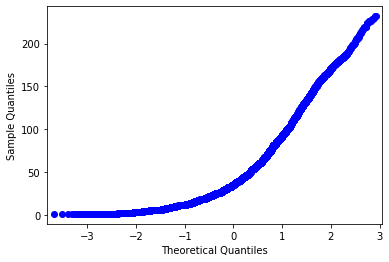

In [0]:
#checking the distribution
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot 
qqplot(c_df['BlueCars_returned_sum'], line='s')
qqplot.show()


Our data appears to be normally distributed

In [0]:
#descriptive anaylysis
skewness = c_df[['BlueCars_returned_sum','BlueCars_taken_sum']].skew()

print(skewness)

BlueCars_returned_sum    1.382665
BlueCars_taken_sum       1.379356
dtype: float64


In [0]:
c_df.shape

(9101, 6)

1.3 skewness reveals a high positively skewed data

---



In [0]:
#further descriptive analysis
c_df.describe()

,Postal code,n_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum
count,9101.000000,9101.000000,9068.000000,9086.000000
mean,93030.955939,1439.796396,49.689237,49.594211
std,910.420920,0.402700,43.514335,43.497631
min,91330.000000,1439.000000,1.000000,1.000000
25%,92270.000000,1440.000000,18.000000,18.000000
50%,93100.000000,1440.000000,36.000000,35.000000
75%,93800.000000,1440.000000,69.000000,69.000000
max,95100.000000,1440.000000,234.000000,232.000000


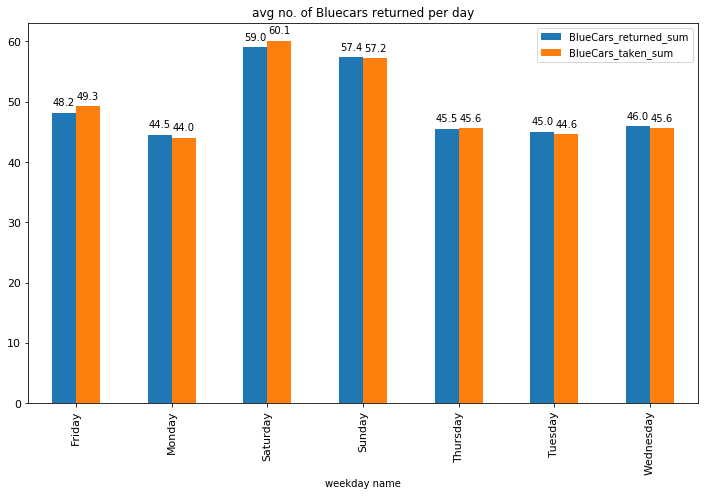

In [0]:
#bivirate analysis
# fig, ax = plt.subplots(figsize = (16,9))
ax = c_df.groupby(['weekday name'])[['BlueCars_returned_sum', 'BlueCars_taken_sum']].mean().plot(kind = 'bar', figsize = (12,7), fontsize = 11)
ax.set_title('avg no. of Bluecars returned per day')
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=1), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

**Findings and Observations**

From our exploratory analysis and observations, we can conclude that Saturdays and sundays in the day has the higest number of bluecars returned and taken per day, thus possible hinting that weekends are bussier than the weekdays and optimal allocation of resources should happen on these days.

**Problem Statement**

The above revealation leads us to the formulation of our **hypothesis**; *The average number of of vehicles returned over the weekend is more than the average number of vehicles during weekdays* 

To test our hypothesis we will use one attribute; 'Bluecar_returned_sum', since there is a strong correlation between **Blucars_returned_Sum** and ***Bluecars_taken_sum***, *thus*, one can act as the representative of the other
formular 

**Null hypothesis**: H 0: μ 1 = μ 2

**alternative hypothesis**: H a : μ 1 ≠ μ 2




In [0]:
#correlation analysis
c_df[['BlueCars_returned_sum', 'BlueCars_taken_sum']].corr(method = 'pearson')

,BlueCars_returned_sum,BlueCars_taken_sum
BlueCars_returned_sum,1.000000,0.990889
BlueCars_taken_sum,0.990889,1.000000


**Hypothesis Testing Procedure**

**Sampling method:**
we will use simple random sampling method is selecting our samples for both w*eekday* and *weekend*. This is because the values of our attributes are homogenous in nature.

**simple size:** we will use a sample size of 1000 which is almost 10% of the population size which suitable to sample.

**Test statistics:** we use z_test model to test our hypothesis.Our decision is informed by the fact that we have a sample size of over 30 (n>30) and we have the standard deviation of the population 

**`confidence level:**  95%

**alpha:**  0.025(two-tailed)


In [0]:
#stating our standard deviation of our population
std1 = c_df[c_df['day_type'] == 'weekend']['BlueCars_returned_sum'].std()
std2 = c_df[c_df['day_type'] == 'weekday']['BlueCars_returned_sum'].std()
print('population standard deviation for the weekend:', std1)
print('population standard deviation for the weekday:', std2)

#stating the sample average of the weekend and the weekday
X1 = c_df[c_df['day_type'] == 'weekend']['BlueCars_returned_sum'].sample(n = 1000, replace="False").mean()
X2 = c_df[c_df['day_type'] == 'weekday']['BlueCars_returned_sum'].sample(n = 1000, replace="False").mean()
print('sample mean for weekend:', X1)
print('sample mean for weekday:', X2)
print('confidence level: 95%, alpha: 0.025(two-tailed)')
print('sample size(n): 1000')



population standard deviation for the weekend: 47.8853282290208
population standard deviation for the weekday: 40.82889716863891
sample mean for weekend: 57.84184184184184
sample mean for weekday: 45.546
confidence level: 95%, alpha: 0.025(two-tailed)
sample size(n): 1000


**Hypothesis Testing Results**

In [0]:
#calculating z_statistics

n = 1000
import math
z_test = (X1-X2)/(math.sqrt((std1**2/n)+(std2**2/n)))
print(z_test)

#Finding the p_value of the z_test

import scipy.stats as stats
from scipy.stats import norm
p =1 - stats.norm.cdf(z_test)
print("p-value:", p)

#Decesion-making

alpha = 0.025
if p < alpha:
  print('reject the null hypothesis')
else:
  print('we fail to reject the null hypothesis')


5.952705560752332
p-value: 1.3187276826087668e-09
reject the null hypothesis


**conclusion**

we rejected the null hypotheisis and accept the alternative hypothesis. Consequently, our key advice to the management of Autolib is, indeed the average number of  cars being taken and returned during weekends is higher than weekdays. Therefore, all critical resources thatstand to increase efficiency and custommer experience should be focused on these two days.

**Discussion of Test Sensitivity**  

As for the sensitivity of the model with regards to changing sample size, reducing the sample size may lead to non-rejectionof the null hypothesis, while inmcreasing the sample size will have no effect on thye model
